In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
%matplotlib inline


In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
def getMissingCount(data):
    try:
        missingCount = data.isnull().sum() * 100/ len(data)
        return missingCount
    except Exception as exp:
        print(str(exp))

In [23]:
def visualizeMissingValue(data):
    try:
        missingCount = getMissingCount(data)
        print(missingCount)
        
        #Plotting missing count columns as fractions
        plt.figure(figsize=(16, 8))
        plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
        plt.ylabel('fraction of rows with missing data')
        plt.bar(np.arange(len(missingCount)), missingCount)
        plt.show()

        #Plotting missing count columns as color coded graph
        plt.figure(figsize=(15, 20))
        sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
        cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
        plt.title("Heart disease - missing values")
        plt.show()
        
        missingColumn = data.columns[data.isna().any()].tolist()
        print(missingColumn)
        
        #TODO. This code is incomplete
        #msno.matrix(data.loc[:,['PctPrivateCoverageAlone']])
        #msno.bar(data.loc[:,['PctPrivateCoverageAlone']], color="blue", log=False, figsize=(30, 18))
        #msno.heatmap(data[missingColumn], figsize=(20, 20))

    except Exception as exp:
        print(str(exp))

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


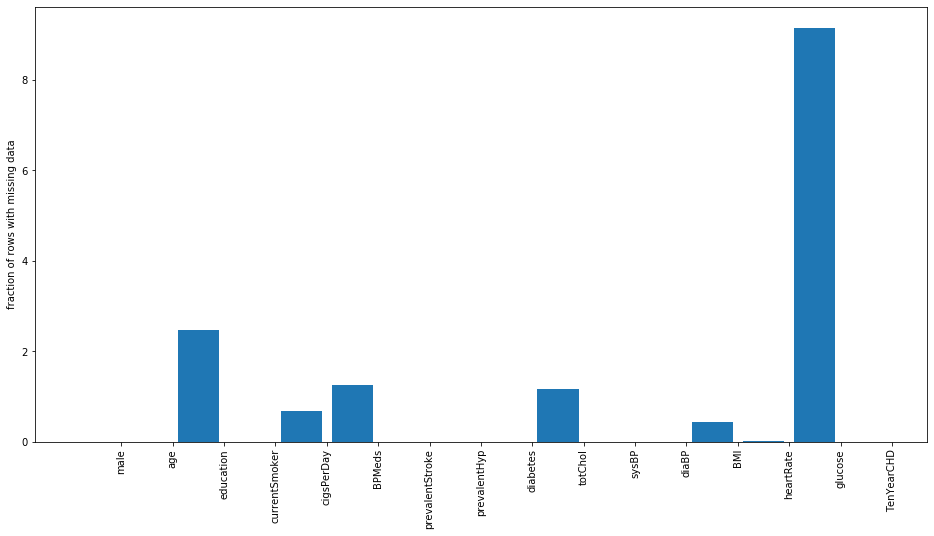

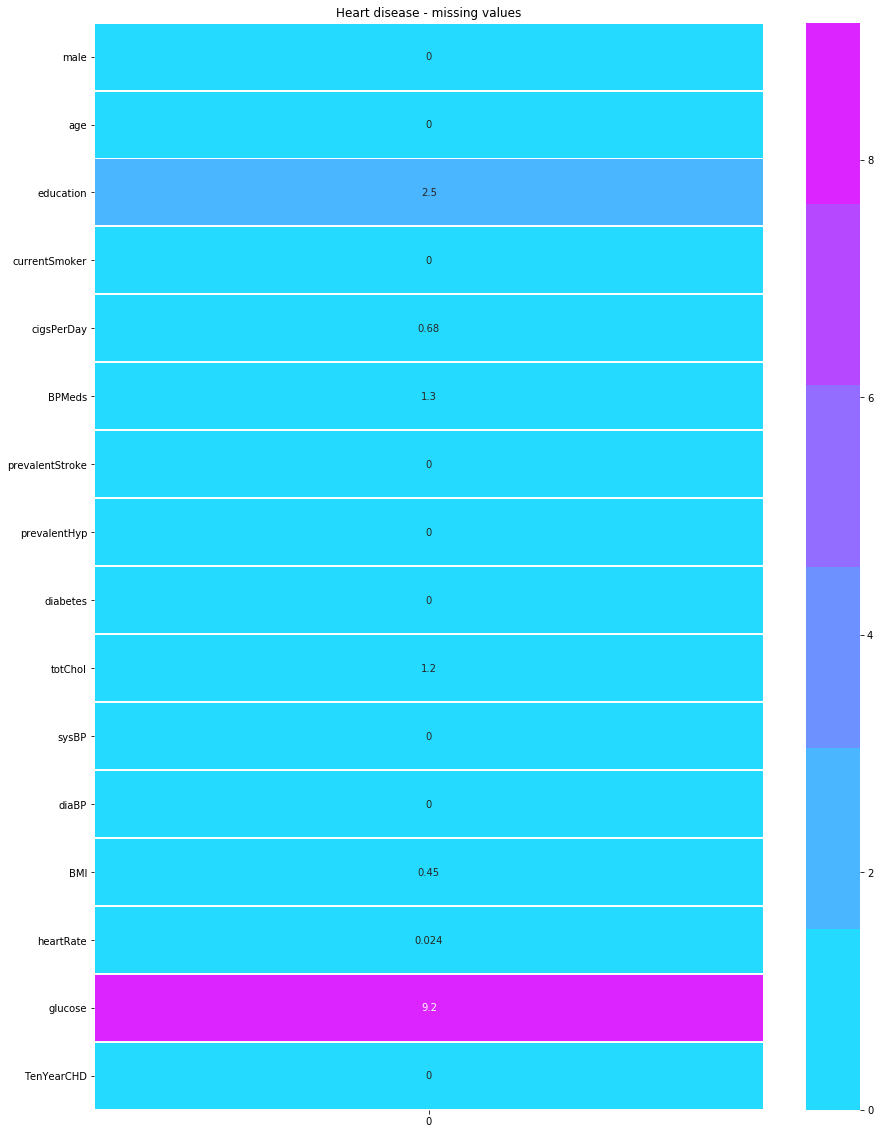

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [11]:
visualizeMissingValue(data)

In [12]:
data_01 = data.dropna(axis = 0, how ='any') 

In [21]:
def visualizeCorrelation(data):
        try:
            d1 = data.copy()

            categoricalCols = d1.select_dtypes(include=["category"]).columns 
            categoricalCols = categoricalCols.tolist()
            for i in categoricalCols:
                d1[i] = d1[i].astype('object')
            
            corr = d1.corr()
            g = sns.heatmap(corr, vmax=.9, center=0, square=True, linewidths=.5, 
                            cbar_kws={"shrink": .5}, annot=True, fmt='.1f', cmap='coolwarm')
            sns.despine()
            g.figure.set_size_inches(24, 20)
            plt.show()
        except Exception as exp:
            print(str(exp))  

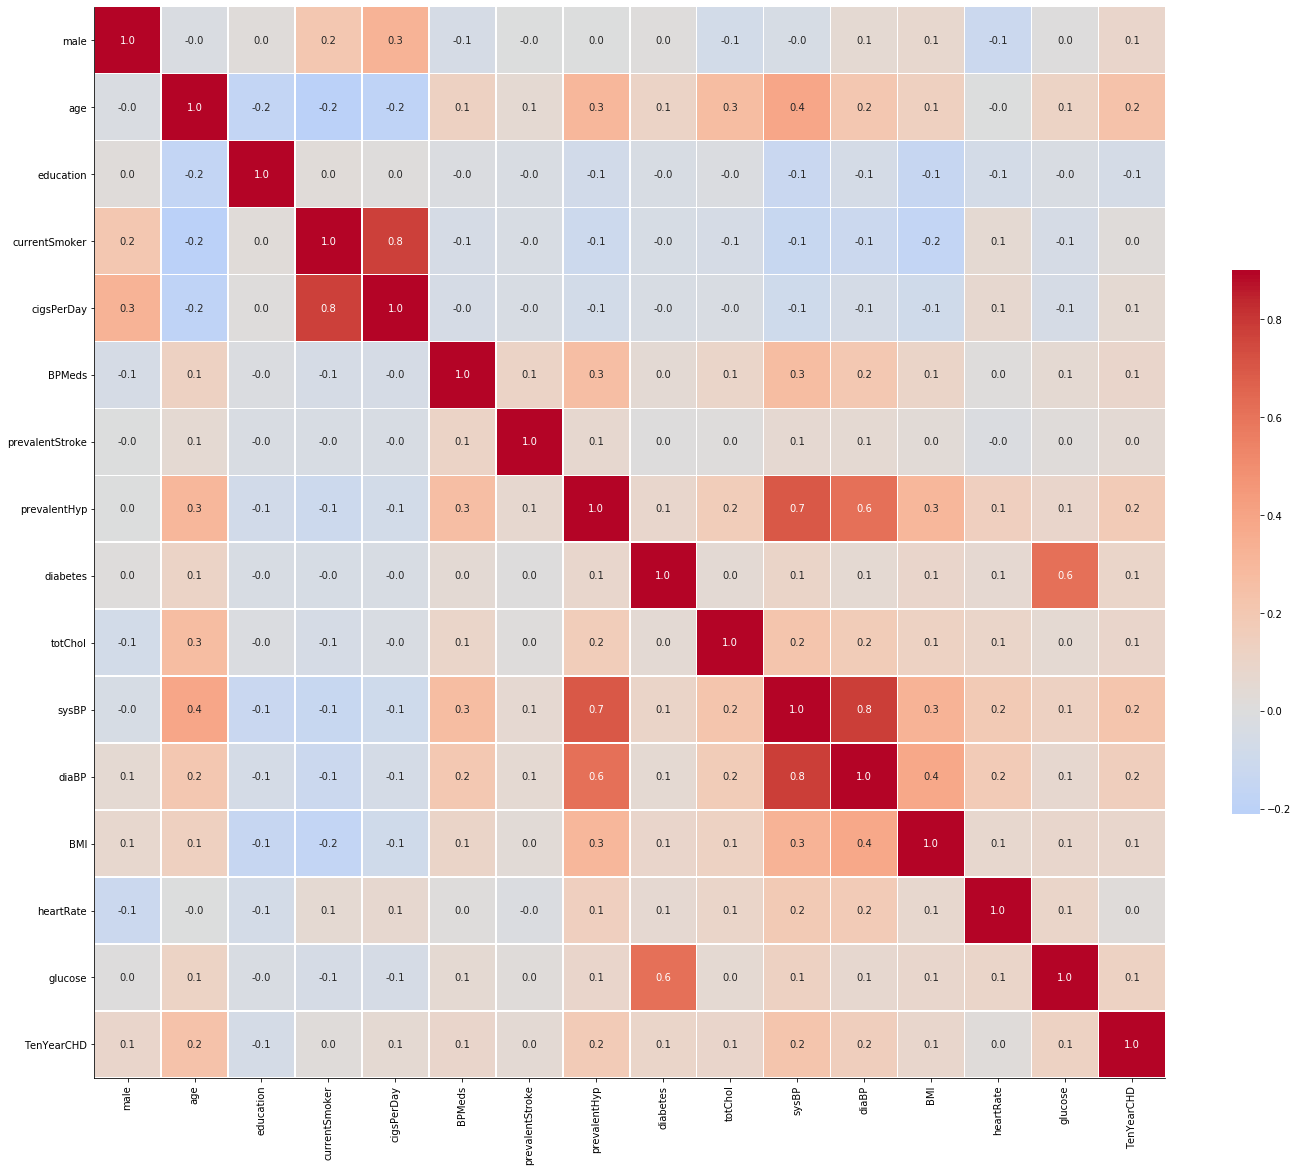

In [22]:
visualizeCorrelation(data_01)

In [35]:
def snsPlot(data, response=['TenYearCHD']):
    try:
        
        d1 = data.copy()
        categoricalCols = d1.select_dtypes(include=["category"]).columns 
        numericCols = d1.select_dtypes(include=["number"]).columns 

        for i in numericCols:
            for j in categoricalCols:
                sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
            
        for i in range(len(numericCols)):
            for j in range(len(numericCols)-1):
                sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full")
                plt.show()

        #TODO : Education is a category. Why does the graph not show this ?
        for i in categoricalCols:
            for j in [response]:
                plt.figure(figsize=(15, 7))
                plt.subplot(121)
                graph = sns.countplot(y=data[i],
                                        palette="Set2",
                                        order=data[i].value_counts().index[:100])
                plt.title("Distribution of " + i)

                plt.subplot(122)
                sns.countplot(y=data[i],
                                hue=data[j], palette="Set2",
                                order=data[i].value_counts().index[:100])
                plt.ylabel("")
                plt.title("Distribution of " + i + " by " + j)

                plt.subplots_adjust(wspace=.4)

    except Exception as exp:
        print(str(exp))



In [36]:
snsPlot(data_01)

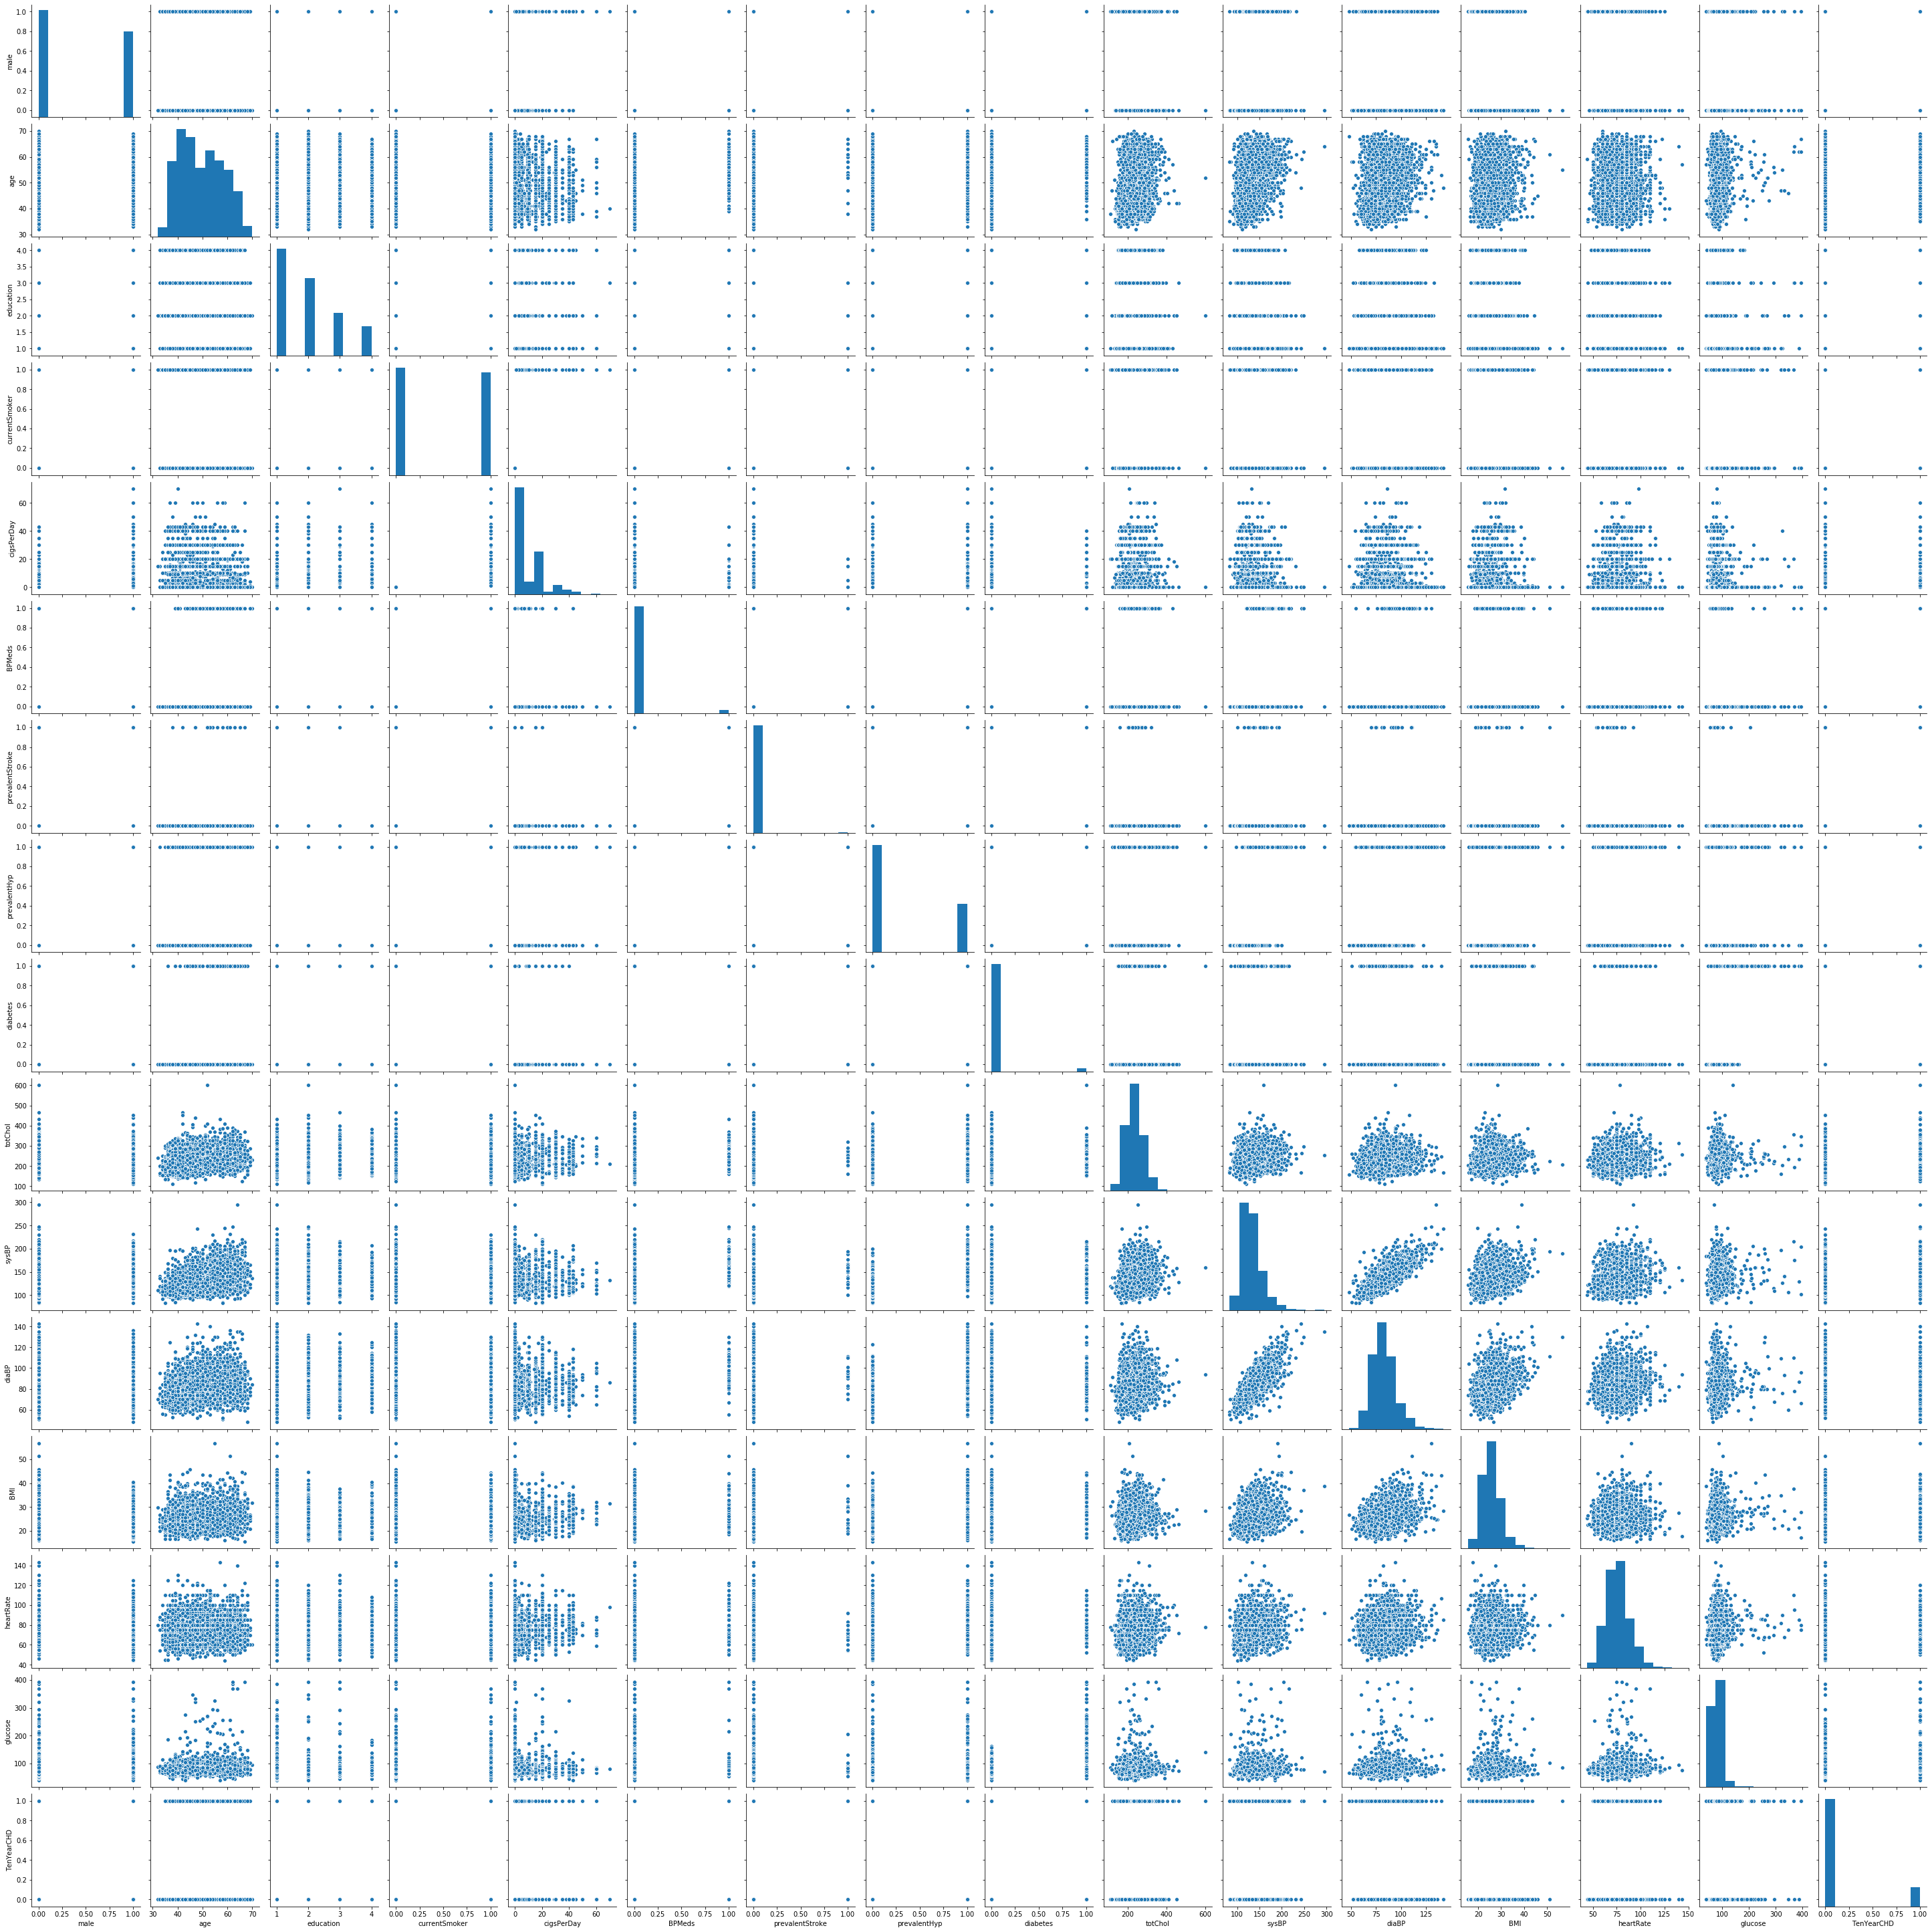

In [30]:
sns.pairplot(data_01)

In [37]:
data_01.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [54]:
def multipleFacets(data):
    #g = sns.FacetGrid(data_01, col="education", hue="glucose")
    g = sns.FacetGrid(data_01, col="education")
    g.map_dataframe(sns.scatterplot, x="glucose", y="heartRate")
    g.set_axis_labels("Glucose", "Heart Rate")
    g.add_legend()

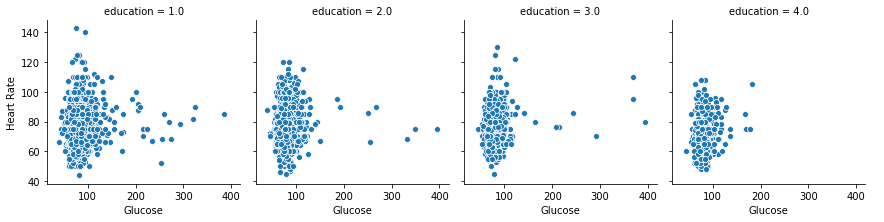

In [55]:
multipleFacets(data_01)

In [80]:
def performPCA(data):
    try:
        pca = PCA()
        pcaModel = pca.fit(data)
        pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
        
        for i in range(len(pcaTransformed.columns)):
            pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)        
        
        comp = pd.DataFrame(pcaModel.components_, columns=data.columns)

        return pcaTransformed
    
    except Exception as exp:
        print(str(exp))


In [81]:
data_02 = performPCA(data_01)

In [82]:
data_02.describe()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
count,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03,3.656000e+03
mean,6.275554e-15,-6.387791e-15,3.472059e-15,-9.221896e-16,1.016206e-15,7.169684e-17,5.569928e-15,2.503468e-15,-2.950928e-17,1.285290e-16,3.094413e-17,-5.879840e-17,-6.419616e-17,5.424332e-18,1.115993e-18,6.288135e-19
std,4.467201e+01,2.517563e+01,2.233046e+01,1.244440e+01,1.119293e+01,7.897686e+00,6.268099e+00,3.693547e+00,9.959700e-01,4.563392e-01,3.416534e-01,3.244914e-01,3.101945e-01,1.633478e-01,1.276872e-01,7.480163e-02
min,-1.240421e+02,-5.461951e+01,-1.300157e+02,-2.848154e+01,-4.158738e+01,-2.814883e+01,-2.352224e+01,-1.221521e+01,-1.526519e+00,-1.065419e+00,-7.908243e-01,-1.015029e+00,-9.253418e-01,-2.616123e-01,-3.675805e-01,-7.595814e-02
25%,-3.121088e+01,-1.518935e+01,-1.126982e+01,-9.384330e+00,-6.908029e+00,-5.654762e+00,-4.160968e+00,-2.446571e+00,-8.532267e-01,-3.769897e-01,-2.076192e-01,-1.845910e-01,-1.912186e-01,-6.746691e-02,-4.318934e-02,-7.590363e-03
50%,-2.436142e+00,-3.990156e+00,9.647850e-01,-1.889198e+00,4.007341e-02,-6.079375e-01,-1.024970e-01,-2.494033e-01,-1.651490e-01,-1.666625e-01,-9.228889e-02,4.601942e-02,1.212644e-01,-5.136212e-03,-7.671863e-03,-3.664988e-03
75%,2.728326e+01,9.817727e+00,1.154757e+01,8.134175e+00,6.876089e+00,5.312827e+00,3.921628e+00,2.089964e+00,7.900933e-01,4.381006e-01,5.271287e-02,2.119097e-01,2.072943e-01,1.252845e-02,2.215439e-02,-1.769481e-04
max,3.645991e+02,2.646722e+02,2.473643e+02,6.189619e+01,5.689295e+01,3.262332e+01,3.894199e+01,2.377226e+01,2.530008e+00,1.284054e+00,1.225647e+00,1.626487e+00,1.403155e+00,9.555688e-01,1.114103e+00,9.986512e-01


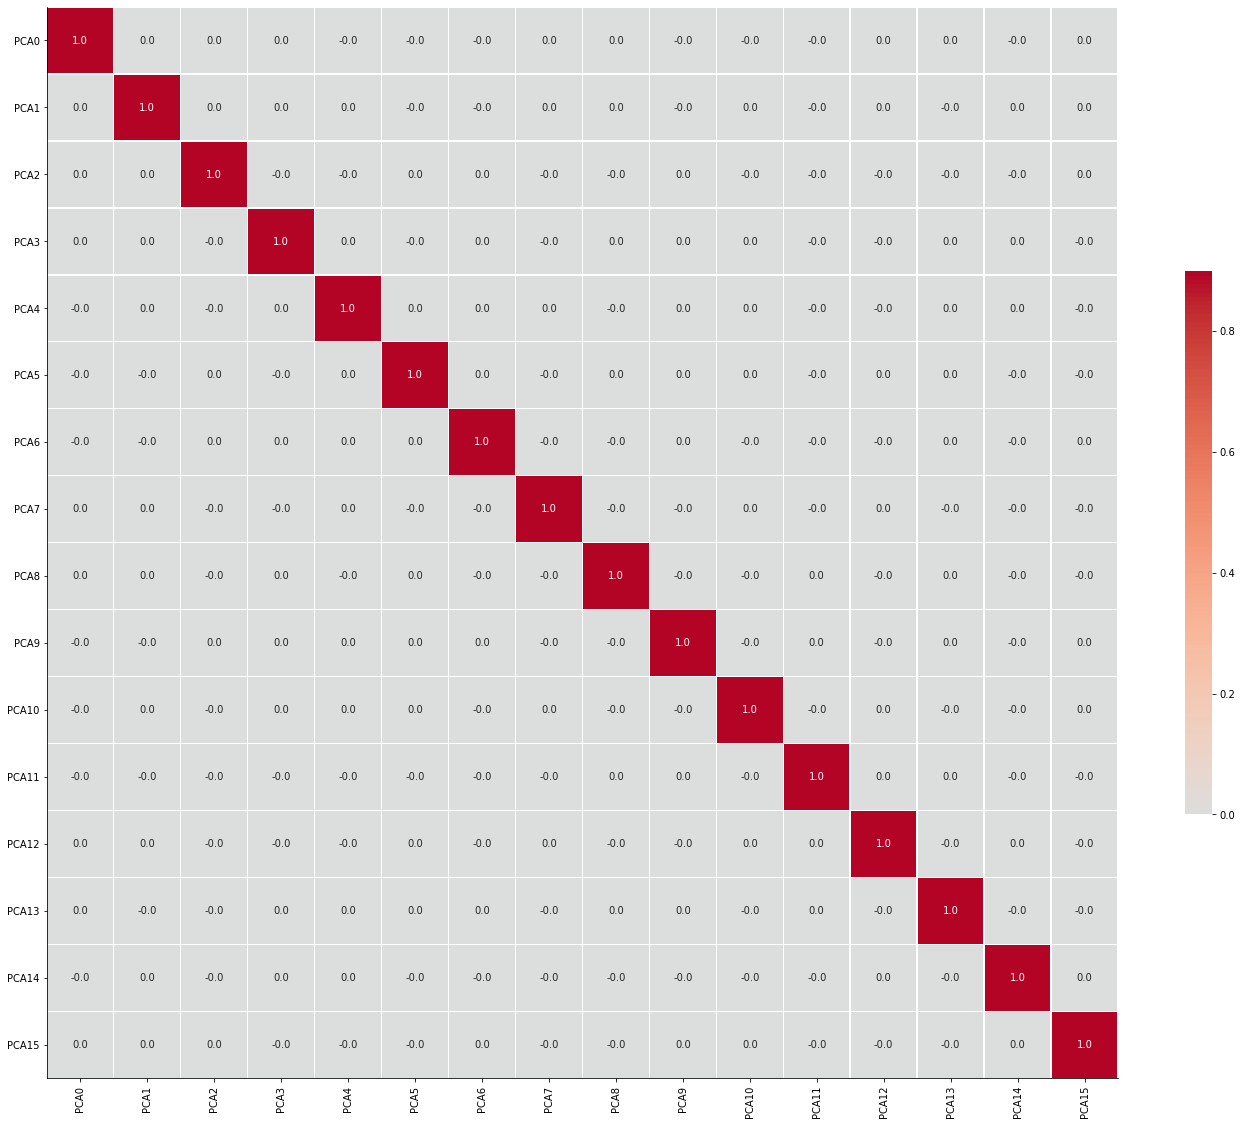

In [83]:
visualizeCorrelation(data_02)